## ☎️ Projeto Aprendizagem de Máquina - Código do relatório 5 (Modeling)

### 🔁 Conectando o Google Colab ao Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### 📚 Importando as bibliotecas necessárias

In [2]:
pip install liac-arff

  Preparing metadata (setup.py) ... done
  Created wheel for liac-arff: filename=liac_arff-2.5.0-py3-none-any.whl size=11717 sha256=483c78a5393660cabb47b24b6b0f2cb73ea75a551b09323aae4bdb66dc6f6df5
  Stored in directory: /root/.cache/pip/wheels/5d/2a/9c/3895d9617f8f49a0883ba686326d598e78a1c2f54fe3cae86d
Successfully built liac-arff


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score
from sklearn import preprocessing
import warnings
import arff


from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.metrics import classification_report, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC


from sklearn.preprocessing import MinMaxScaler
from scipy import stats
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [4]:
from matplotlib import rcParams
from cycler import cycler

rcParams['figure.figsize'] = 10, 8

warnings.filterwarnings('ignore')

sns.set(style="whitegrid")
colors = ["#115f9a", "#1984c5", "#22a7f0", "#48b5c4", "#76c68f", "#a6d75b", "#c9e52f", "#d0ee11", "#d0f400"]
plt.rcParams['axes.prop_cycle'] = cycler(color=colors)

In [26]:
with open('/content/drive/MyDrive/Projetos Aprendizagem de Máquina/Terceiro Projeto/1. Dados/pol.arff', 'r') as file:
    data = arff.load(file)

df = pd.DataFrame(data['data'])

df.columns = [attr[0] for attr in data['attributes']]

In [6]:
df.head(10)

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f40,f41,f42,f43,f44,f45,f46,f47,f48,binaryClass
0,110.0,100.0,100.0,100.0,60.0,108.0,76.0,71.0,94.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,P
1,110.0,100.0,100.0,100.0,130.0,77.0,76.0,71.0,94.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,P
2,110.0,100.0,100.0,100.0,110.0,89.0,76.0,71.0,94.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,P
3,110.0,100.0,100.0,100.0,13.0,126.0,89.0,72.0,94.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,P
4,110.0,100.0,100.0,100.0,15.0,119.0,78.0,71.0,94.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,P
5,110.0,100.0,100.0,100.0,50.0,113.0,100.0,143.0,94.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,P
6,110.0,100.0,100.0,100.0,117.0,77.0,76.0,71.0,94.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,P
7,110.0,100.0,100.0,100.0,81.0,110.0,77.0,72.0,94.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,P
8,110.0,100.0,100.0,100.0,44.0,96.0,76.0,71.0,94.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,N
9,110.0,100.0,100.0,100.0,66.0,80.0,95.0,71.0,94.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,N


### Preparação dos dados

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_predict, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, roc_curve, auc
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# Função para remover outliers usando Z-score
def remover_outliers_zscore(df, threshold=3):
    df_clean = df.copy()
    for col in df.select_dtypes(include=['float64', 'int64']).columns:
        z_scores = stats.zscore(df[col])
        abs_z_scores = abs(z_scores)
        mask = abs_z_scores > threshold
        df_clean = df_clean[~mask]
    return df_clean

# Função para remover colunas constantes
def remover_colunas_constantes(df):
    nunique = df.apply(pd.Series.nunique)
    cols_to_drop = nunique[nunique == 1].index
    return df.drop(cols_to_drop, axis=1), cols_to_drop

# Alterar o target de P e N para 1 e 0
df['binaryClass'] = df['binaryClass'].map({'P': 1, 'N': 0})

# Dividir o DataFrame em treino, teste e validação
train_df, temp_df = train_test_split(df, test_size=0.3, random_state=42, stratify=df['binaryClass'])
test_df, val_df = train_test_split(temp_df, test_size=0.5, random_state=42, stratify=temp_df['binaryClass'])

# Aplicar a remoção de outliers no conjunto de treino
cleaned_train_df = remover_outliers_zscore(train_df)

# Remover colunas constantes no conjunto de treino
cleaned_train_df, cols_to_drop = remover_colunas_constantes(cleaned_train_df)

# Remover linhas duplicadas no conjunto de treino
cleaned_train_df = cleaned_train_df.drop_duplicates()

# Normalizar os dados no conjunto de treino
scaler = MinMaxScaler()
train_features = cleaned_train_df.drop(columns=['binaryClass'])
train_target = cleaned_train_df['binaryClass']
scaler.fit(train_features)
train_features_scaled = scaler.transform(train_features)
cleaned_train_df_scaled = pd.DataFrame(train_features_scaled, columns=train_features.columns)
cleaned_train_df_scaled['binaryClass'] = train_target.values

# Balanceamento dos dados no conjunto de treino usando SMOTE
smote = SMOTE(random_state=42)
train_features_balanced, train_target_balanced = smote.fit_resample(cleaned_train_df_scaled.drop(columns=['binaryClass']), cleaned_train_df_scaled['binaryClass'])
cleaned_train_df_balanced = pd.DataFrame(train_features_balanced, columns=cleaned_train_df_scaled.drop(columns=['binaryClass']).columns)
cleaned_train_df_balanced['binaryClass'] = train_target_balanced.values

# Separar os dados do conjunto de treino
train_features = cleaned_train_df_balanced.drop(columns=['binaryClass'])
train_target = cleaned_train_df_balanced['binaryClass']

# Remover as mesmas colunas do conjunto de validação
val_df_clean = val_df.drop(columns=cols_to_drop)

# Remover as mesmas colunas do conjunto de teste
test_df_clean = test_df.drop(columns=cols_to_drop)

# Normalizar os dados no conjunto de validação
val_features = val_df_clean.drop(columns=['binaryClass'])
val_target = val_df_clean['binaryClass']
val_features_scaled = scaler.transform(val_features)

# Separar os dados do conjunto de teste
test_features = test_df_clean.drop(columns=['binaryClass'])
test_target = test_df_clean['binaryClass']
test_features_scaled = scaler.transform(test_features)

### Modelagem

#### 1. K-NN (K-Nearest Neighbors)

##### Baseline

In [31]:
knn_baseline = KNeighborsClassifier()

# Usar cross-validation para treinar e validar o modelo
cv_scores = cross_val_score(knn_baseline, train_features, train_target, cv=5, scoring='accuracy')
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean cross-validation score: {np.mean(cv_scores)}")

# Ajustar o modelo aos dados de treino completos
knn_baseline.fit(train_features, train_target)

# Prever os resultados no conjunto de validação
val_predictions_baseline = knn_baseline.predict(val_features_scaled)

# Prever os resultados no conjunto de teste
test_predictions_baseline = knn_baseline.predict(test_features_scaled)

# Imprimir o classification report da versão baseline
print("\nClassification Report [Validação] - Baseline KNN:")
print(classification_report(val_target, val_predictions_baseline))
print("Classification Report [Teste] - Baseline KNN:")
print(classification_report(test_target, test_predictions_baseline))

Cross-validation scores: [0.93514329 0.93509434 0.94415094 0.94641509 0.94566038]
Mean cross-validation score: 0.9412928085602893

Classification Report [Validação] - Baseline KNN:
              precision    recall  f1-score   support

           0       0.68      0.96      0.80       756
           1       0.98      0.78      0.86      1494

    accuracy                           0.84      2250
   macro avg       0.83      0.87      0.83      2250
weighted avg       0.88      0.84      0.84      2250

Classification Report [Teste] - Baseline KNN:
              precision    recall  f1-score   support

           0       0.69      0.97      0.81       756
           1       0.98      0.78      0.87      1494

    accuracy                           0.85      2250
   macro avg       0.84      0.88      0.84      2250
weighted avg       0.88      0.85      0.85      2250



##### Otimizado com Randomized Search

Classification Report - Best KNN:
              precision    recall  f1-score   support

           0       0.90      0.93      0.92       756
           1       0.97      0.95      0.96      1494

    accuracy                           0.94      2250
   macro avg       0.93      0.94      0.94      2250
weighted avg       0.94      0.94      0.94      2250



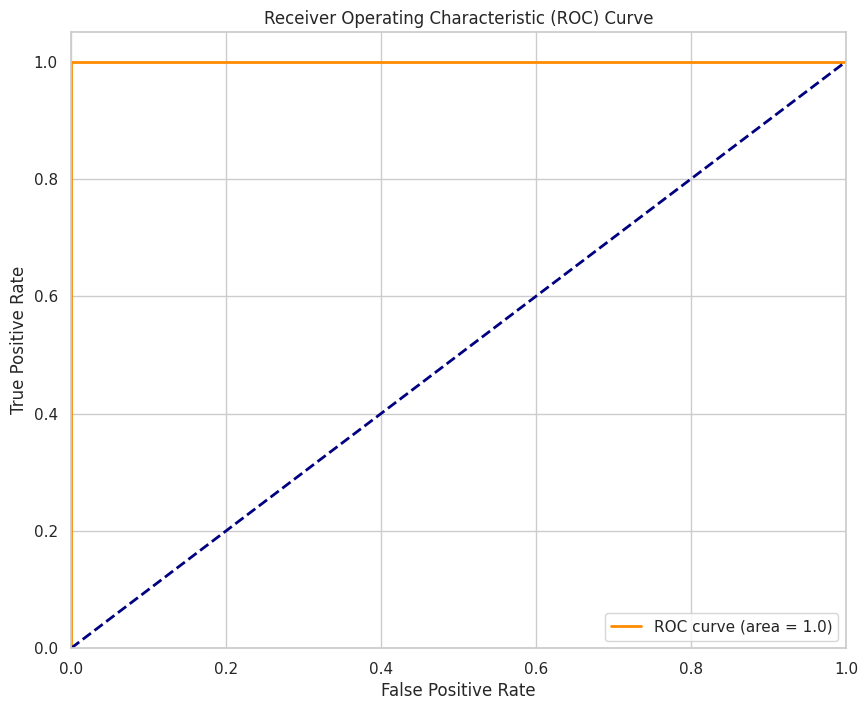

In [ ]:
# Definir a grade de parâmetros para o RandomizedSearchCV
param_distributions = {
    'n_neighbors': np.arange(1, 31),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Configurar o RandomizedSearchCV
random_search = RandomizedSearchCV(knn_baseline, param_distributions, n_iter=100, cv=5, random_state=42, n_jobs=-1)

# Ajustar o RandomizedSearchCV no conjunto de validação
random_search.fit(val_features_scaled, val_target)

# Melhor modelo encontrado
best_knn = random_search.best_estimator_

# Prever os resultados com o melhor modelo
val_predictions_best = cross_val_predict(best_knn, val_features_scaled, val_target, cv=5)

# Imprimir o classification report do melhor modelo
print("Classification Report - Best KNN:")
print(classification_report(val_target, val_predictions_best))

# Plotar a curva ROC para o melhor modelo
y_proba = best_knn.predict_proba(val_features_scaled)[:, 1]
fpr, tpr, _ = roc_curve(val_target, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

#### 2. LVQ (Learning Vector Quantization)

##### Baseline

In [ ]:
from sklearn_lvq import GlvqModel
from sklearn.model_selection import cross_val_predict

# Baseline LVQ model
lvq_baseline = GlvqModel()

# Usar cross-validation para prever os resultados no conjunto de validação
val_predictions_lvq_baseline = cross_val_predict(lvq_baseline, val_features_scaled, val_target, cv=5)

# Imprimir o classification report da versão baseline
print("Classification Report - Baseline LVQ:")
print(classification_report(val_target, val_predictions_lvq_baseline))

ValueError: 'x0' must only have one dimension.

##### Otimizado com Randomized Search

In [ ]:
from sklearn_lvq import GrlvqModel
from sklearn.model_selection import RandomizedSearchCV

# Definir a grade de parâmetros para o RandomizedSearchCV
param_distributions = {
    'prototypes_per_class': np.arange(1, 10),
    'initial_prototypes': ['kmeans', 'random'],
    'max_iter': [1000, 2000, 3000]
}

# Configurar o RandomizedSearchCV
random_search_lvq = RandomizedSearchCV(GlvqModel(), param_distributions, n_iter=50, cv=5, random_state=42, n_jobs=-1)

# Ajustar o RandomizedSearchCV no conjunto de validação
random_search_lvq.fit(val_features_scaled, val_target)

# Melhor modelo encontrado
best_lvq = random_search_lvq.best_estimator_

# Prever os resultados com o melhor modelo
val_predictions_lvq_best = cross_val_predict(best_lvq, val_features_scaled, val_target, cv=5)

# Imprimir o classification report do melhor modelo
print("Classification Report - Best LVQ:")
print(classification_report(val_target, val_predictions_lvq_best))

# Plotar a curva ROC para o melhor modelo
y_proba_lvq = best_lvq.predict_proba(val_features_scaled)[:, 1]
fpr_lvq, tpr_lvq, _ = roc_curve(val_target, y_proba_lvq)
roc_auc_lvq = auc(fpr_lvq, tpr_lvq)

plt.figure()
plt.plot(fpr_lvq, tpr_lvq, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_lvq:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

#### 3. Árvore de Decisão

##### Baseline

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Modelo de Árvore de Decisão na versão baseline
dt_baseline = DecisionTreeClassifier(random_state=42)

# Usar cross-validation para prever os resultados no conjunto de validação
val_predictions_dt_baseline = cross_val_predict(dt_baseline, val_features_scaled, val_target, cv=5)

# Imprimir o classification report da versão baseline
print("Classification Report - Baseline Decision Tree:")
print(classification_report(val_target, val_predictions_dt_baseline))

Classification Report - Baseline Decision Tree:
              precision    recall  f1-score   support

           0       0.93      0.92      0.92       756
           1       0.96      0.96      0.96      1494

    accuracy                           0.95      2250
   macro avg       0.94      0.94      0.94      2250
weighted avg       0.95      0.95      0.95      2250



##### Otimizado com Randomized Search

Classification Report - Best Decision Tree:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       756
           1       0.97      0.97      0.97      1494

    accuracy                           0.96      2250
   macro avg       0.96      0.96      0.96      2250
weighted avg       0.96      0.96      0.96      2250



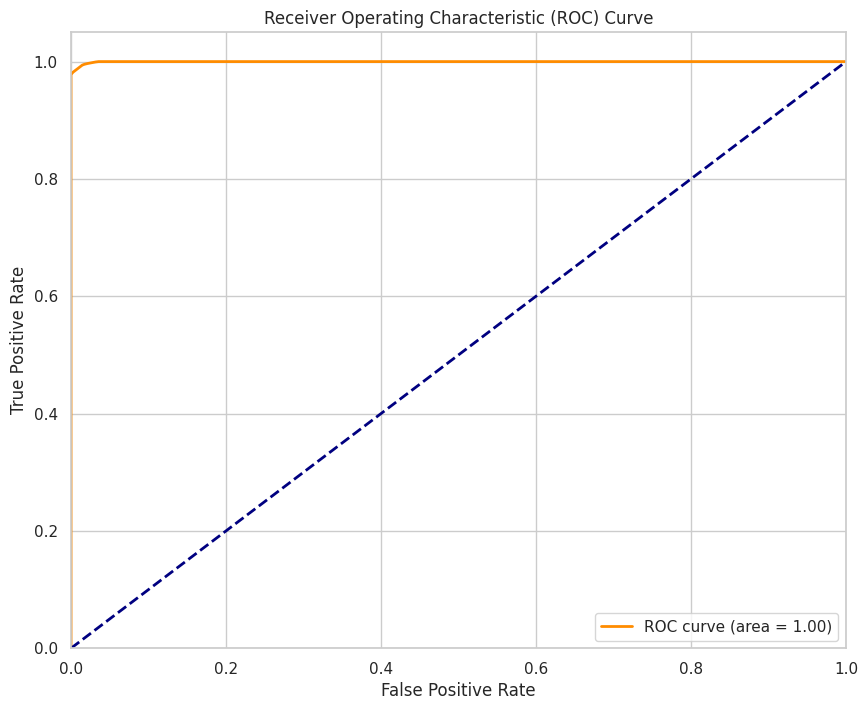

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Definir a grade de parâmetros para o RandomizedSearchCV
param_distributions_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': np.arange(3, 20),
    'min_samples_split': np.arange(2, 20),
    'min_samples_leaf': np.arange(1, 20)
}

# Configurar o RandomizedSearchCV
random_search_dt = RandomizedSearchCV(DecisionTreeClassifier(random_state=42), param_distributions_dt, n_iter=50, cv=5, random_state=42, n_jobs=-1)

# Ajustar o RandomizedSearchCV no conjunto de validação
random_search_dt.fit(val_features_scaled, val_target)

# Melhor modelo encontrado
best_dt = random_search_dt.best_estimator_

# Prever os resultados com o melhor modelo
val_predictions_dt_best = cross_val_predict(best_dt, val_features_scaled, val_target, cv=5)

# Imprimir o classification report do melhor modelo
print("Classification Report - Best Decision Tree:")
print(classification_report(val_target, val_predictions_dt_best))

# Plotar a curva ROC para o melhor modelo
y_proba_dt = best_dt.predict_proba(val_features_scaled)[:, 1]
fpr_dt, tpr_dt, _ = roc_curve(val_target, y_proba_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

plt.figure()
plt.plot(fpr_dt, tpr_dt, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_dt:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

4. SVM (Support Vector Machine)

##### Baseline

In [ ]:
from sklearn.svm import SVC

# Modelo SVM na versão baseline
svm_baseline = SVC(probability=True, random_state=42)

# Usar cross-validation para prever os resultados no conjunto de validação
val_predictions_svm_baseline = cross_val_predict(svm_baseline, val_features_scaled, val_target, cv=5)

# Imprimir o classification report da versão baseline
print("Classification Report - Baseline SVM:")
print(classification_report(val_target, val_predictions_svm_baseline))

Classification Report - Baseline SVM:
              precision    recall  f1-score   support

           0       0.93      0.87      0.90       756
           1       0.94      0.97      0.95      1494

    accuracy                           0.94      2250
   macro avg       0.93      0.92      0.93      2250
weighted avg       0.93      0.94      0.93      2250



##### Otimizado com Randomized Search

Classification Report - Best SVM:
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       756
           1       0.98      0.98      0.98      1494

    accuracy                           0.97      2250
   macro avg       0.97      0.97      0.97      2250
weighted avg       0.97      0.97      0.97      2250



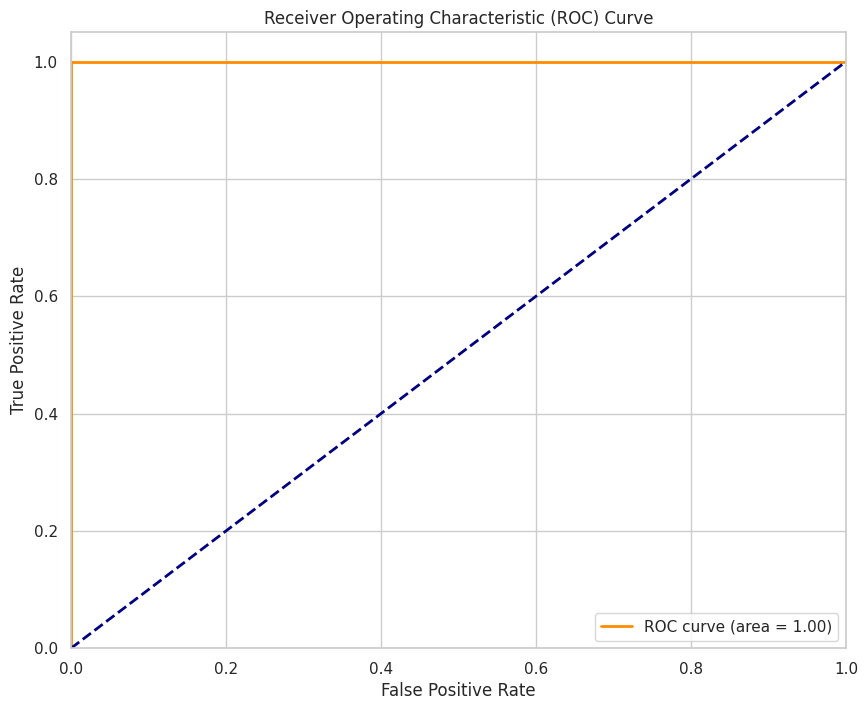

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Definir a grade de parâmetros para o RandomizedSearchCV
param_distributions_svm = {
    'C': np.logspace(-3, 3, 7),  # Regularization parameter
    'gamma': np.logspace(-3, 3, 7),  # Kernel coefficient
    'kernel': ['linear', 'rbf', 'poly']
}

# Configurar o RandomizedSearchCV
random_search_svm = RandomizedSearchCV(SVC(probability=True, random_state=42), param_distributions_svm, n_iter=50, cv=5, random_state=42, n_jobs=-1)

# Ajustar o RandomizedSearchCV no conjunto de validação
random_search_svm.fit(val_features_scaled, val_target)

# Melhor modelo encontrado
best_svm = random_search_svm.best_estimator_

# Prever os resultados com o melhor modelo
val_predictions_svm_best = cross_val_predict(best_svm, val_features_scaled, val_target, cv=5)

# Imprimir o classification report do melhor modelo
print("Classification Report - Best SVM:")
print(classification_report(val_target, val_predictions_svm_best))

# Plotar a curva ROC para o melhor modelo
y_proba_svm = best_svm.predict_proba(val_features_scaled)[:, 1]
fpr_svm, tpr_svm, _ = roc_curve(val_target, y_proba_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)

plt.figure()
plt.plot(fpr_svm, tpr_svm, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_svm:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

##### 5. Random Forest

##### Baseline

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Modelo Random Forest na versão baseline
rf_baseline = RandomForestClassifier(random_state=42)

# Usar cross-validation para prever os resultados no conjunto de validação
val_predictions_rf_baseline = cross_val_predict(rf_baseline, val_features_scaled, val_target, cv=5)

# Imprimir o classification report da versão baseline
print("Classification Report - Baseline Random Forest:")
print(classification_report(val_target, val_predictions_rf_baseline))

Classification Report - Baseline Random Forest:
              precision    recall  f1-score   support

           0       0.97      0.91      0.94       756
           1       0.96      0.99      0.97      1494

    accuracy                           0.96      2250
   macro avg       0.96      0.95      0.96      2250
weighted avg       0.96      0.96      0.96      2250



##### Otimizado com Randomized Search

Classification Report - Best Random Forest:
              precision    recall  f1-score   support

           0       0.97      0.91      0.94       756
           1       0.95      0.99      0.97      1494

    accuracy                           0.96      2250
   macro avg       0.96      0.95      0.95      2250
weighted avg       0.96      0.96      0.96      2250



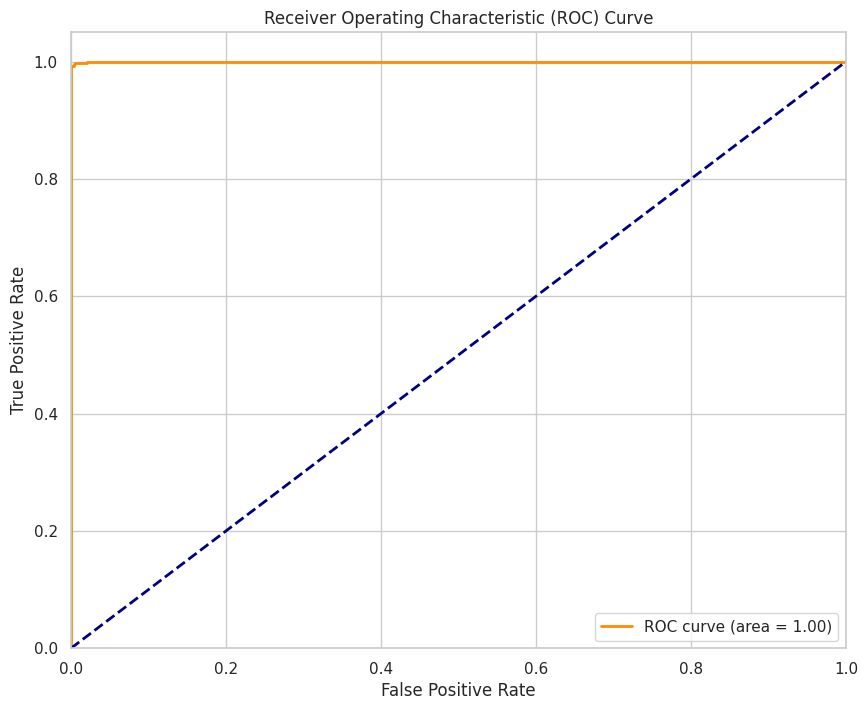

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Definir a grade de parâmetros para o RandomizedSearchCV
param_distributions_rf = {
    'n_estimators': np.arange(50, 201, 50),  # Número de árvores na floresta
    'max_features': ['auto', 'sqrt', 'log2'],  # Número de features a serem consideradas para a melhor divisão
    'max_depth': np.arange(3, 20),  # Profundidade máxima da árvore
    'min_samples_split': np.arange(2, 20),  # Número mínimo de amostras necessárias para dividir um nó interno
    'min_samples_leaf': np.arange(1, 20)  # Número mínimo de amostras necessárias para estar em um nó folha
}

# Configurar o RandomizedSearchCV
random_search_rf = RandomizedSearchCV(RandomForestClassifier(random_state=42), param_distributions_rf, n_iter=50, cv=5, random_state=42, n_jobs=-1)

# Ajustar o RandomizedSearchCV no conjunto de validação
random_search_rf.fit(val_features_scaled, val_target)

# Melhor modelo encontrado
best_rf = random_search_rf.best_estimator_

# Prever os resultados com o melhor modelo
val_predictions_rf_best = cross_val_predict(best_rf, val_features_scaled, val_target, cv=5)

# Imprimir o classification report do melhor modelo
print("Classification Report - Best Random Forest:")
print(classification_report(val_target, val_predictions_rf_best))

# Plotar a curva ROC para o melhor modelo
y_proba_rf = best_rf.predict_proba(val_features_scaled)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(val_target, y_proba_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.figure()
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

#### 6. Rede Neural MLP (Multi-Layer Perceptron)

##### Baseline

In [ ]:
from sklearn.neural_network import MLPClassifier

# Modelo MLP na versão baseline
mlp_baseline = MLPClassifier(random_state=42)

# Usar cross-validation para prever os resultados no conjunto de validação
val_predictions_mlp_baseline = cross_val_predict(mlp_baseline, val_features_scaled, val_target, cv=5)

# Imprimir o classification report da versão baseline
print("Classification Report - Baseline MLP:")
print(classification_report(val_target, val_predictions_mlp_baseline))

Classification Report - Baseline MLP:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       756
           1       0.98      0.98      0.98      1494

    accuracy                           0.98      2250
   macro avg       0.97      0.98      0.97      2250
weighted avg       0.98      0.98      0.98      2250



##### Otimizado com Randomized Search

Classification Report - Best MLP:
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       756
           1       0.99      0.99      0.99      1494

    accuracy                           0.98      2250
   macro avg       0.98      0.98      0.98      2250
weighted avg       0.98      0.98      0.98      2250



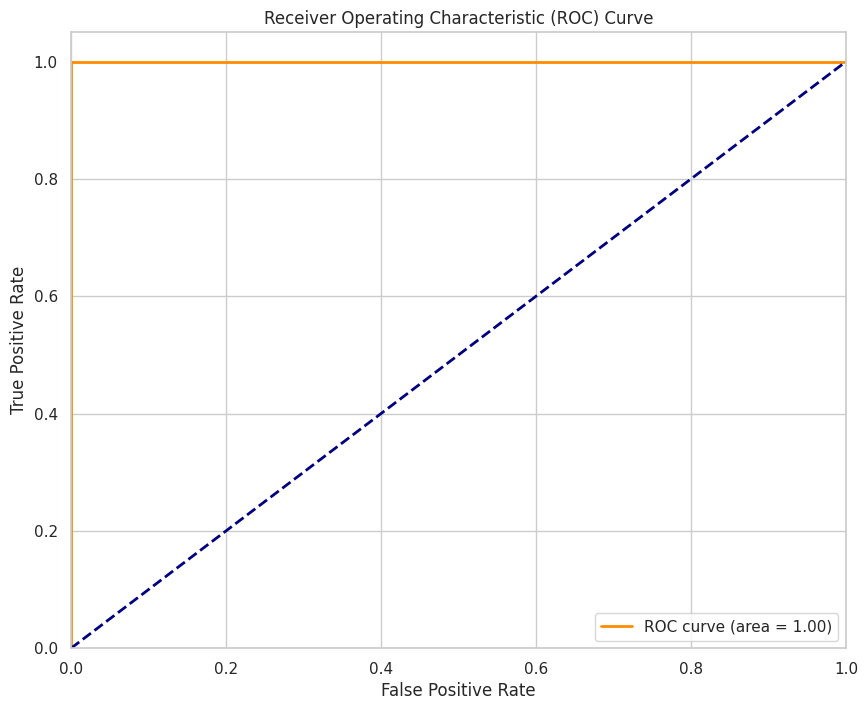

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Definir a grade de parâmetros para o RandomizedSearchCV
param_distributions_mlp = {
    'hidden_layer_sizes': [(50,), (100,), (150,), (100, 50), (100, 100), (100, 50, 25)],
    'activation': ['identity', 'logistic', 'tanh', 'relu'],
    'solver': ['lbfgs', 'sgd', 'adam'],
    'alpha': np.logspace(-5, 5, 11),  # Regularização L2
    'learning_rate': ['constant', 'adaptive'],
    'learning_rate_init': np.logspace(-5, 0, 6)  # Taxa de aprendizado inicial
}

# Configurar o RandomizedSearchCV
random_search_mlp = RandomizedSearchCV(MLPClassifier(random_state=42), param_distributions_mlp, n_iter=50, cv=5, random_state=42, n_jobs=-1)

# Ajustar o RandomizedSearchCV no conjunto de validação
random_search_mlp.fit(val_features_scaled, val_target)

# Melhor modelo encontrado
best_mlp = random_search_mlp.best_estimator_

# Prever os resultados com o melhor modelo
val_predictions_mlp_best = cross_val_predict(best_mlp, val_features_scaled, val_target, cv=5)

# Imprimir o classification report do melhor modelo
print("Classification Report - Best MLP:")
print(classification_report(val_target, val_predictions_mlp_best))

# Plotar a curva ROC para o melhor modelo
y_proba_mlp = best_mlp.predict_proba(val_features_scaled)[:, 1]
fpr_mlp, tpr_mlp, _ = roc_curve(val_target, y_proba_mlp)
roc_auc_mlp = auc(fpr_mlp, tpr_mlp)

plt.figure()
plt.plot(fpr_mlp, tpr_mlp, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_mlp:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

#### 7. Comitê de Redes Neurais Artificiais

##### Baseline

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_predict

# Criar diferentes configurações de redes neurais
mlp1 = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', random_state=42)
mlp2 = MLPClassifier(hidden_layer_sizes=(50, 25), activation='tanh', solver='adam', random_state=42)
mlp3 = MLPClassifier(hidden_layer_sizes=(100, 50), activation='logistic', solver='sgd', random_state=42)

# Criar o comitê de redes neurais
committee = VotingClassifier(estimators=[('mlp1', mlp1), ('mlp2', mlp2), ('mlp3', mlp3)], voting='soft')

# Usar cross-validation para prever os resultados no conjunto de validação
val_predictions_committee_baseline = cross_val_predict(committee, val_features_scaled, val_target, cv=5)

# Imprimir o classification report da versão baseline
print("Classification Report - Baseline Neural Network Committee:")
print(classification_report(val_target, val_predictions_committee_baseline))

Comitê de Redes Neurais Baseline Accuracy: 0.9874742024531148


##### Otimizado com Randomized Search

Classification Report - Best Neural Network Committee:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       756
           1       0.98      0.98      0.98      1494

    accuracy                           0.98      2250
   macro avg       0.97      0.98      0.97      2250
weighted avg       0.98      0.98      0.98      2250



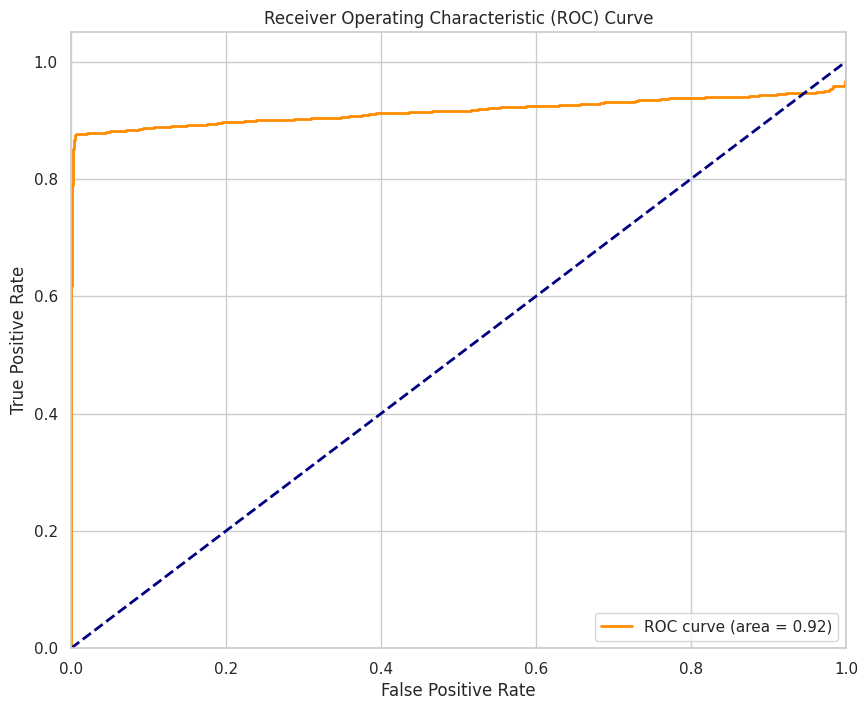

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV, cross_val_predict
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report, roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt

# Definir a grade de parâmetros para o RandomizedSearchCV para cada rede neural
param_distributions_mlp1 = {
    'hidden_layer_sizes': [(50,), (100,), (150,)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'alpha': np.logspace(-5, 0, 6),
    'learning_rate': ['constant', 'adaptive']
}

param_distributions_mlp2 = param_distributions_mlp1
param_distributions_mlp3 = param_distributions_mlp1

# Configurar o RandomizedSearchCV para cada rede neural
random_search_mlp1 = RandomizedSearchCV(MLPClassifier(random_state=42), param_distributions_mlp1, n_iter=30, cv=5, random_state=42, n_jobs=-1)
random_search_mlp2 = RandomizedSearchCV(MLPClassifier(random_state=42), param_distributions_mlp2, n_iter=30, cv=5, random_state=42, n_jobs=-1)
random_search_mlp3 = RandomizedSearchCV(MLPClassifier(random_state=42), param_distributions_mlp3, n_iter=30, cv=5, random_state=42, n_jobs=-1)

# Ajustar o RandomizedSearchCV no conjunto de validação
random_search_mlp1.fit(val_features_scaled, val_target)
random_search_mlp2.fit(val_features_scaled, val_target)
random_search_mlp3.fit(val_features_scaled, val_target)

# Melhor modelo encontrado para cada rede neural
best_mlp1 = random_search_mlp1.best_estimator_
best_mlp2 = random_search_mlp2.best_estimator_
best_mlp3 = random_search_mlp3.best_estimator_

# Criar o comitê otimizado de redes neurais
committee_best = VotingClassifier(estimators=[('mlp1', best_mlp1), ('mlp2', best_mlp2), ('mlp3', best_mlp3)], voting='soft')

# Ajustar o comitê no conjunto de treinamento
committee_best.fit(train_features_scaled, train_target)  # Use train_features_scaled and train_target

# Usar cross-validation para prever os resultados no conjunto de validação
val_predictions_committee_best = cross_val_predict(committee_best, val_features_scaled, val_target, cv=5)

# Imprimir o classification report do melhor modelo
print("Classification Report - Best Neural Network Committee:")
print(classification_report(val_target, val_predictions_committee_best))

# Plotar a curva ROC para o melhor modelo
y_proba_committee = committee_best.predict_proba(val_features_scaled)[:, 1]
fpr_committee, tpr_committee, _ = roc_curve(val_target, y_proba_committee)
roc_auc_committee = auc(fpr_committee, tpr_committee)

plt.figure()
plt.plot(fpr_committee, tpr_committee, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_committee:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

#### 8. Comitê Heterogêneo

##### Baseline

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_predict

# Criar os modelos
dt = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(random_state=42)
svm = SVC(probability=True, random_state=42)
mlp = MLPClassifier(random_state=42)

# Criar o comitê heterogêneo
heterogeneous_committee_baseline = VotingClassifier(
    estimators=[('dt', dt), ('rf', rf), ('svm', svm), ('mlp', mlp)],
    voting='soft'
)

# Usar cross-validation para prever os resultados no conjunto de validação
val_predictions_heterogeneous_baseline = cross_val_predict(
    heterogeneous_committee_baseline, val_features_scaled, val_target, cv=5
)

# Imprimir o classification report da versão baseline
print("Classification Report - Baseline Heterogeneous Committee:")
print(classification_report(val_target, val_predictions_heterogeneous_baseline))

Classification Report - Baseline Heterogeneous Committee:
              precision    recall  f1-score   support

           0       0.97      0.94      0.95       756
           1       0.97      0.98      0.98      1494

    accuracy                           0.97      2250
   macro avg       0.97      0.96      0.96      2250
weighted avg       0.97      0.97      0.97      2250



##### Otimizado com Randomized Search

Classification Report - Best Heterogeneous Committee:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       756
           1       1.00      1.00      1.00      1494

    accuracy                           1.00      2250
   macro avg       1.00      1.00      1.00      2250
weighted avg       1.00      1.00      1.00      2250



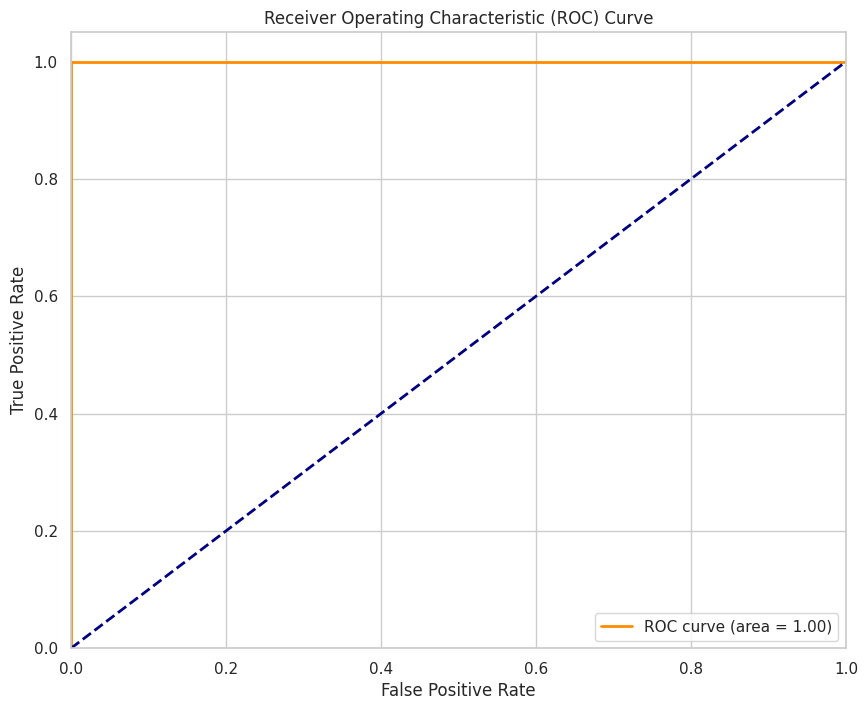

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Criar o comitê heterogêneo otimizado
heterogeneous_committee_best = VotingClassifier(
    estimators=[('dt', best_dt), ('rf', best_rf), ('svm', best_svm), ('mlp', best_mlp)],
    voting='soft'
)

# Ajustar o comitê heterogêneo otimizado no conjunto de validação
heterogeneous_committee_best.fit(val_features_scaled, val_target)

# Usar o comitê ajustado para prever os resultados no conjunto de validação
val_predictions_heterogeneous_best = heterogeneous_committee_best.predict(val_features_scaled)

# Imprimir o classification report do melhor modelo
print("Classification Report - Best Heterogeneous Committee:")
print(classification_report(val_target, val_predictions_heterogeneous_best))

# Plotar a curva ROC para o melhor modelo
y_proba_committee_best = heterogeneous_committee_best.predict_proba(val_features_scaled)[:, 1]
fpr_committee_best, tpr_committee_best, _ = roc_curve(val_target, y_proba_committee_best)
roc_auc_committee_best = auc(fpr_committee_best, tpr_committee_best)

plt.figure()
plt.plot(fpr_committee_best, tpr_committee_best, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_committee_best:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()